In [1]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Problem 2
N = 10
H = qt.num(N) + qt.qeye(N) / 2
lambd = .01

def state_correction(n):
    total = 0 * qt.basis(N)
    psi_n = qt.basis(N, n)
    for m in range(N):
        if m == n:
            continue
        psi_m = qt.basis(N, m)
        total += psi_m * (psi_m.dag() * lambd * qt.position(N)**4 * psi_n / (n - m))
    return total

print(f"First order correction to state 0:\n{state_correction(0)}")
print(f"\nFirst order correction to state 1:\n{state_correction(1)}\n")

def first_energy_correction(n):
    return qt.expect(lambd * qt.position(N)**4, qt.basis(N, n))

def second_energy_correction(n):
    total = 0
    psi_n = qt.basis(N, n)
    for m in range(N):
        if m == n:
            continue
        psi_m = qt.basis(N, m)
        total += (psi_m.dag() * lambd * qt.position(N)**4 * psi_n)**2 / (n - m)
    # imaginary component will only exist because of rounding errors
    return np.real(total)

for i in range(N):
    print(f"First order correction to energy of state {i}: {first_energy_correction(i):.5f}")
print('\n')
for i in range(N):
    print(f"Second order correction to energy of state {i}: {second_energy_correction(i):.5f}")
print("\nPredicted energies, based on unperturbed energy" \
      " plus first and second order corrections:")
for i in range(N):
    predicted_energy = i + 0.5 + \
        first_energy_correction(i) + \
        second_energy_correction(i)
    print(f"Predicted energy of state {i}: {predicted_energy:.5f}")
    
# Make new Hamiltonian
H += lambd * qt.position(N)**4
actual_energies = H.eigenenergies()
print('\n')
for i in range(N):
    print(f"Actual energy of state {i}: {actual_energies[i]:.5f}" +
          f" = {2*i+1}/2 + {actual_energies[i] - (i+1/2):.5f}")

First order correction to state 0:
Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [-0.0106066 ]
 [ 0.        ]
 [-0.00306186]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

First order correction to state 1:
Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.03061862]
 [ 0.        ]
 [-0.00684653]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

First order correction to energy of state 0: 0.00750
First order correction to energy of state 1: 0.03750
First order correction to energy of state 2: 0.09750
First order correction to energy of state 3: 0.18750
First order correction to energy of state 4: 0.30750
First order correction to energy of state 5: 0.45750
First order correction to energy of state 6: 0.63750
First order correction to energy of state 7: 0.84750
First order correction to energy

In [4]:
# Problem 3

# Part (a)
Psi_1 = (qt.ket("0") + qt.ket("1")).unit()
Psi_2 = qt.ket("0")
Psi = qt.tensor(Psi_1, Psi_2)
print("Part (a)")
print(f"Total state vector:\n{Psi}")
expectation_value = qt.expect(qt.tensor(qt.sigmaz(), qt.qeye(2)), Psi)
print(f"Expectation value of sigma_z for qubit 1: {expectation_value}")
expectation_value = qt.expect(qt.tensor(qt.qeye(2), qt.sigmaz()), Psi)
print(f"Expectation value of sigma_z for qubit 2: {expectation_value}")
expectation_value = qt.expect(qt.tensor(qt.sigmaz(), qt.sigmaz()), Psi)
print(f"Expectation value of sigma_z tensor sigma_z: {expectation_value}")

# Part (b)
Psi_1 = (qt.ket("0") + qt.ket("1")).unit()
Psi_2 = Psi_1
Psi = qt.tensor(Psi_1, Psi_2)
print("\n\nPart (b)")
print(f"Total state vector:\n{Psi}")
expectation_value = qt.expect(qt.tensor(qt.sigmaz(), qt.sigmaz()), Psi)
print(f"Expectation value of sigma_z tensor sigma_z: {expectation_value}")
expectation_value = qt.expect(qt.tensor(qt.sigmax(), qt.sigmax()), Psi)
print(f"Expectation value of sigma_x tensor sigma_x: {expectation_value}")

# Part (c)
Psi = (qt.ket("00") + qt.ket("11")).unit()
print("\n\nPart (c)")
print(f"Total state vector:\n{Psi}")
expectation_value = qt.expect(qt.tensor(qt.sigmaz(), qt.sigmaz()), Psi)
print(f"Expectation value of sigma_z tensor sigma_z: {expectation_value}")
expectation_value = qt.expect(qt.tensor(qt.sigmax(), qt.sigmax()), Psi)
print(f"Expectation value of sigma_x tensor sigma_x: {expectation_value}")

Part (a)
Total state vector:
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]
Expectation value of sigma_z for qubit 1: 0.0
Expectation value of sigma_z for qubit 2: 0.9999999999999998
Expectation value of sigma_z tensor sigma_z: 0.0


Part (b)
Total state vector:
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.5]
 [0.5]
 [0.5]
 [0.5]]
Expectation value of sigma_z tensor sigma_z: 0.0
Expectation value of sigma_x tensor sigma_x: 0.9999999999999996


Part (c)
Total state vector:
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]
Expectation value of sigma_z tensor sigma_z: 0.9999999999999998
Expectation value of sigma_x tensor sigma_x: 0.9999999999999998


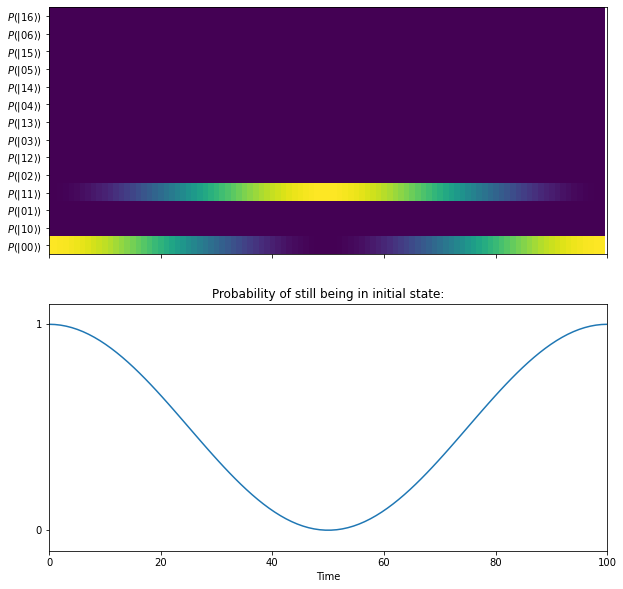

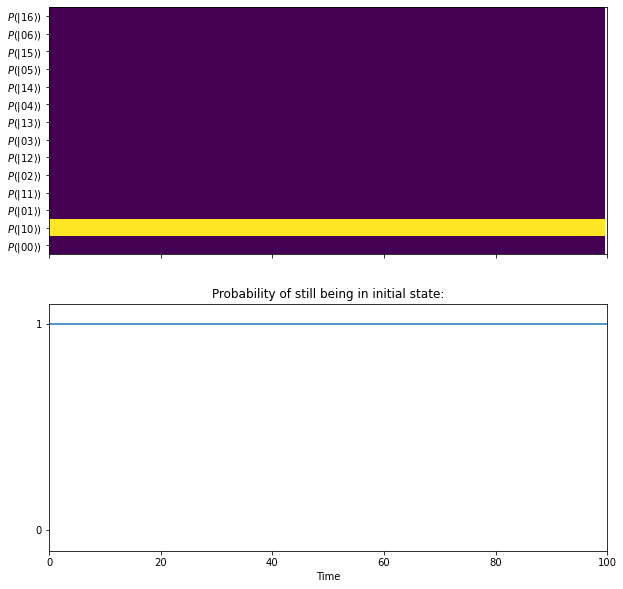

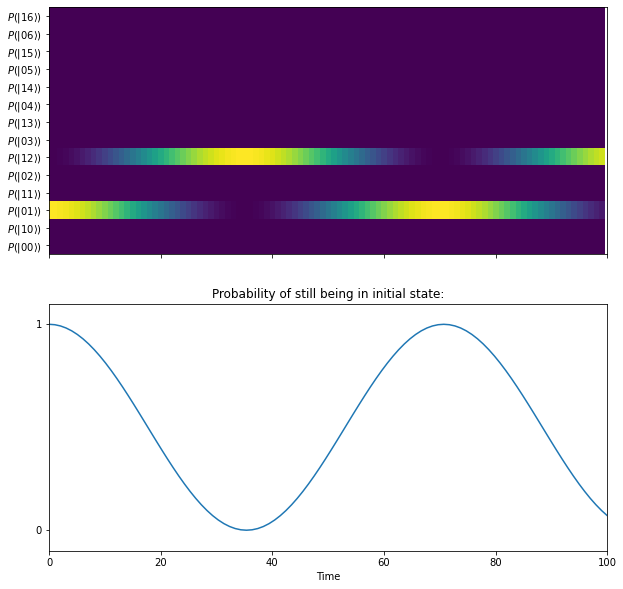

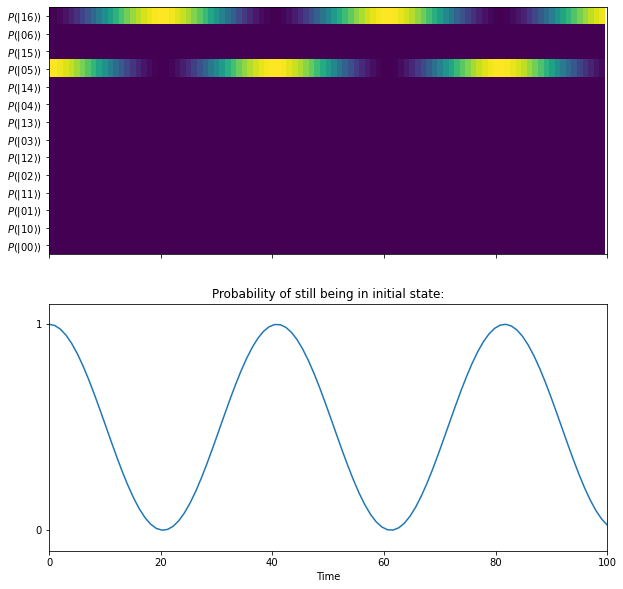

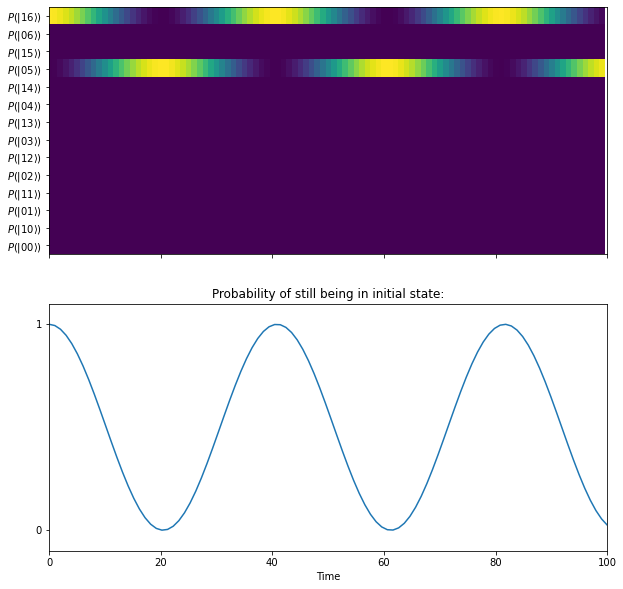

In [5]:
# Problem 4, part (a)
N = 7
omega_0 = 2 * np.pi
g = omega_0 / 100
a = qt.destroy(N)
a_dag = qt.create(N)
def H(omega):
    return (omega_0 / 2) * qt.tensor(qt.sigmaz(), qt.qeye(N)) + \
        omega * (qt.tensor(qt.qeye(2), qt.num(N)) + qt.tensor(qt.qeye(2), qt.qeye(N))) + \
        (g / 2) * (qt.tensor(qt.sigmap(), qt.destroy(N)) + qt.tensor(qt.sigmam(), qt.create(N)))

H_a = H(omega_0)

def plot_time_evo(initial_state, hamiltonian):
    times = np.linspace(0, 100, 100)
    evolved_states = []
    for t in times:
        U = (-1j * hamiltonian * t).expm()
        evolved_states.append(U * initial_state)

    _, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
    # Make heatmap
    basis_states = [qt.ket([i % 2, i // 2], [2, N]) for i in reversed(range(2 * N))]
    heatmap = np.matrix([[qt.expect(b.proj(), s) for s in evolved_states]
                         for b in basis_states])
    ax1.imshow(heatmap, aspect="auto")
    ax1.set_yticks(range(2 * N))
    ax1.set_yticklabels([f"$P(|{i%2}{i//2}\\rangle)$" for i in reversed(range(2 * N))])
    # Make line graph
    y_values = [qt.expect(initial_state.proj(), s) for s in evolved_states]
    plt.xlim(0, 100)
    plt.ylim(-.1, 1.1)
    ax2.set_yticks([0, 1])
    ax2.set_title("Probability of still being in initial state:")
    ax2.plot(times, y_values)
    plt.xlabel("Time")
    plt.show()
    
    
for Psi in [
    qt.ket("00", [2, N]),
    qt.ket("10", [2, N]),
    qt.ket("01", [2, N]),
    qt.ket("05", [2, N]),
    qt.ket("16", [2, N])
]:
    plot_time_evo(Psi, H_a)

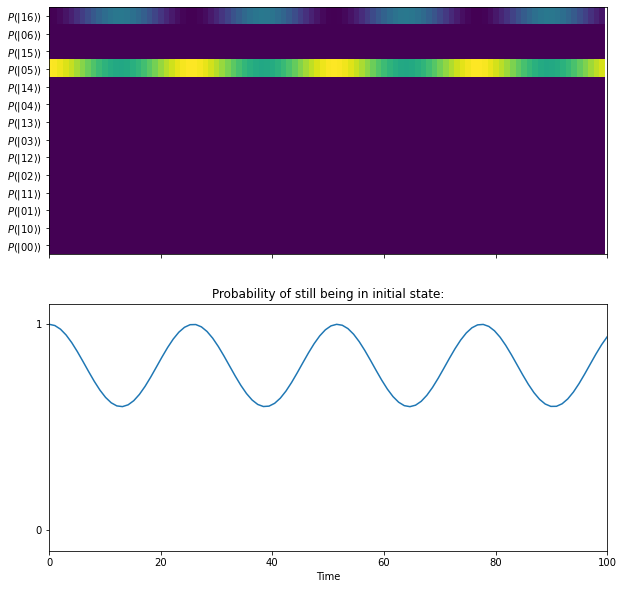

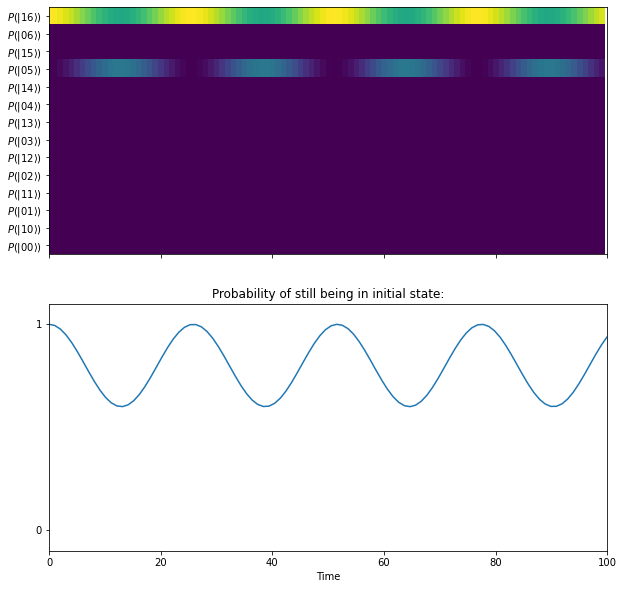

In [6]:
# Problem 4, part (b)
H_b = H(omega_0 * 1.03)

for Psi in [
    qt.ket("05", [2, N]),
    qt.ket("16", [2, N])
]:
    plot_time_evo(Psi, H_b)